## Use Prophet Model for Easy Python Forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df=pd.read_csv('forecastdata.csv',delimiter=';')

In [3]:
df.head()

,Date,Users
0,08/10/2021,1193
1,08/11/2021,1250
2,08/12/2021,1160
3,8/13/2021,817
4,8/14/2021,362


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    417 non-null    object
 1   Users   417 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.6+ KB


In [5]:
#  let's change the Date Type from object to date
df['Date']=pd.to_datetime(df['Date'])

In [6]:
ts=df
ts.columns=['ds','y']
ts.head()

,ds,y
0,2021-08-10,1193
1,2021-08-11,1250
2,2021-08-12,1160
3,2021-08-13,817
4,2021-08-14,362


In [7]:
ts.set_index('ds')

,y
ds,
2021-08-10,1193
2021-08-11,1250
2021-08-12,1160
2021-08-13,817
2021-08-14,362
...,...
2022-09-26,1815
2022-09-27,1816
2022-09-28,1859


<AxesSubplot:xlabel='ds'>

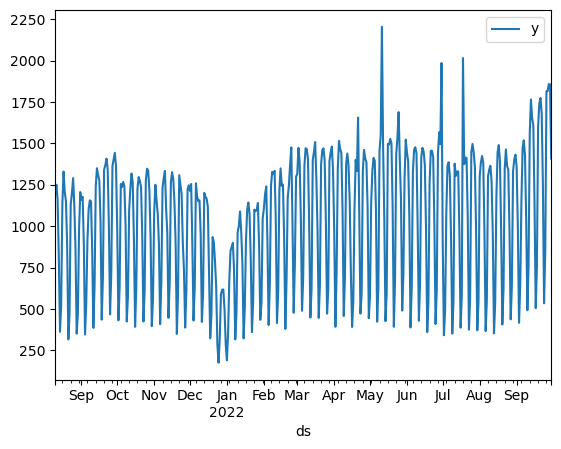

In [8]:
ts.set_index('ds').plot()

In [9]:
model=Prophet().fit(ts)
future=model.make_future_dataframe(60)
forecast=model.predict(future)
forecast.head()

05:00:18 - cmdstanpy - INFO - Chain [1] start processing
05:00:18 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,999.987345,1116.639013,1517.104780,999.987345,999.987345,311.319559,311.319559,311.319559,311.319559,311.319559,311.319559,0.0,0.0,0.0,1311.306904
1,2021-08-11,999.055743,1130.913834,1530.233708,999.055743,999.055743,326.573654,326.573654,326.573654,326.573654,326.573654,326.573654,0.0,0.0,0.0,1325.629398
2,2021-08-12,998.124141,1076.721226,1458.316122,998.124141,998.124141,264.052719,264.052719,264.052719,264.052719,264.052719,264.052719,0.0,0.0,0.0,1262.176860
3,2021-08-13,997.192539,720.451828,1096.994072,997.192539,997.192539,-82.885476,-82.885476,-82.885476,-82.885476,-82.885476,-82.885476,0.0,0.0,0.0,914.307063
4,2021-08-14,996.260937,176.818235,575.281266,996.260937,996.260937,-625.478962,-625.478962,-625.478962,-625.478962,-625.478962,-625.478962,0.0,0.0,0.0,370.781975


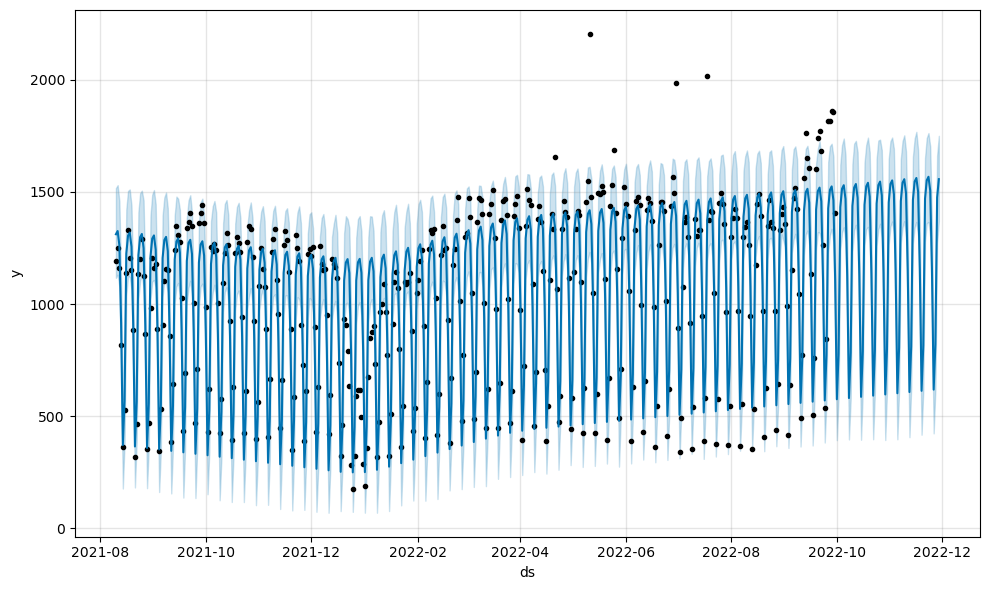

In [14]:
model.plot(forecast);

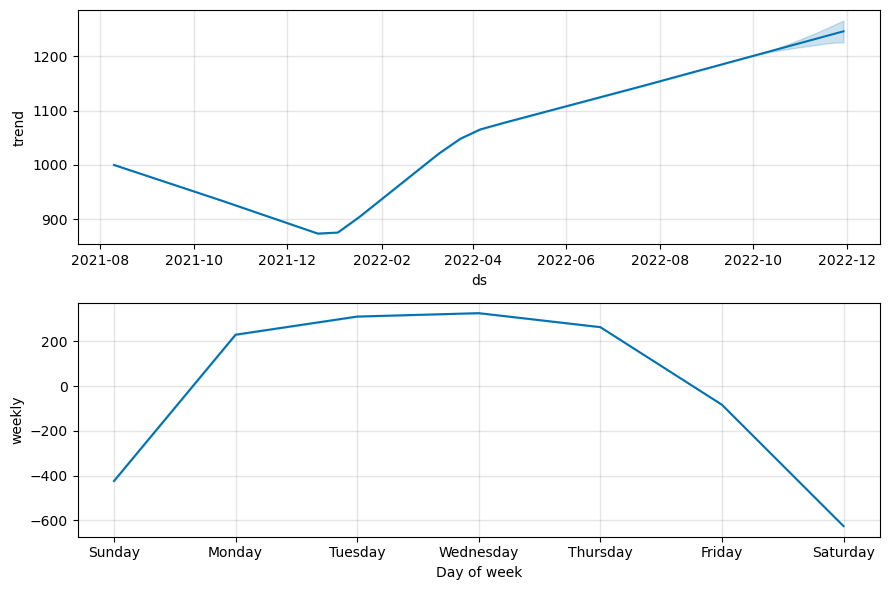

In [16]:
model.plot_components(forecast);

In [17]:
from prophet.plot import add_changepoints_to_plot

[[<matplotlib.lines.Line2D at 0x13bcabf92e0>],

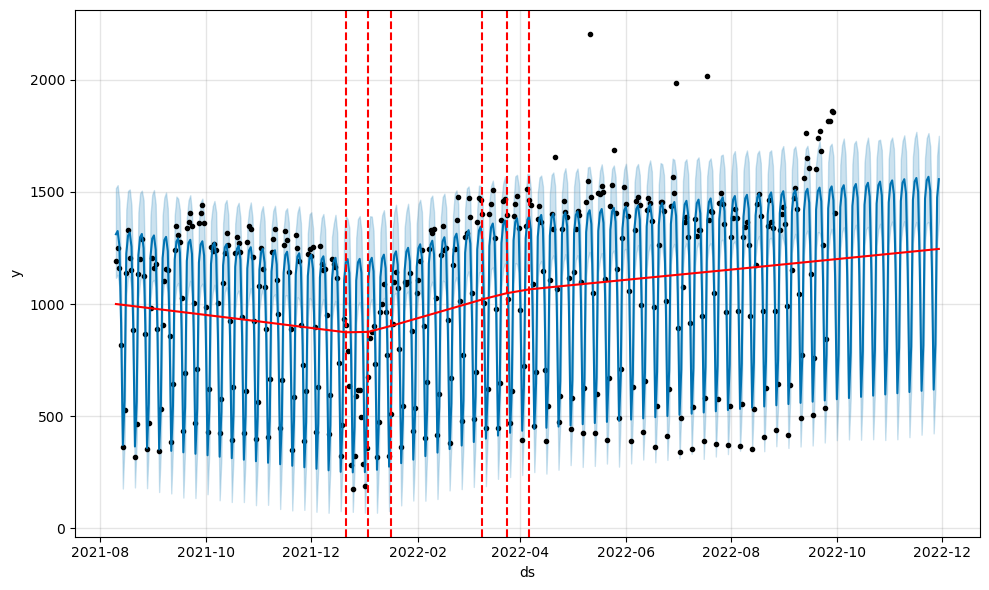

In [19]:
fig=model.plot(forecast)
add_changepoints_to_plot(fig.gca(),model,forecast)

In [20]:
model.changepoints

13    2021-08-23
27    2021-09-06
40    2021-09-19
53    2021-10-02
66    2021-10-15
80    2021-10-29
93    2021-11-11
106   2021-11-24
120   2021-12-08
133   2021-12-21
146   2022-01-03
159   2022-01-16
173   2022-01-30
186   2022-02-12
199   2022-02-25
212   2022-03-10
226   2022-03-24
239   2022-04-06
252   2022-04-19
266   2022-05-03
279   2022-05-16
292   2022-05-29
305   2022-06-11
319   2022-06-25
332   2022-07-08
Name: ds, dtype: datetime64[ns]